# IMPORTING NECESSARY LIBRARIES

In [37]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(context='notebook', style='white', palette='colorblind')

#### MODELS ####

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
from sklearn.model_selection import  GridSearchCV, learning_curve, cross_val_score

# LOADING DATA

In [2]:
original_df = pd.read_csv('creditcard.csv')
df = pd.read_csv('creditcard.csv')

print(f'original_df:{original_df.shape}\ndf:{df.shape}')

original_df:(284807, 31)
df:(284807, 31)


# CLEANING DATA

#### * As per the rules the names for the features are kept confidential

In [3]:
df.sample(3) # Randomly display 3 rows 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
230870,146514.0,-1.322530,1.141743,-0.302488,-1.748464,2.032171,3.941132,-0.551143,1.639970,0.242098,...,-0.218035,-0.601239,0.050687,0.669889,-0.189920,0.050165,0.447741,0.248920,1.99,0
269911,163832.0,-0.900424,0.408541,0.720160,-2.470459,1.543902,0.931294,0.889296,0.288213,0.715748,...,0.195175,0.860601,-0.587735,-0.513186,1.213357,-0.687414,0.103341,0.040646,15.15,0
253200,156141.0,0.056413,1.365653,-1.628607,-0.410572,0.929826,-1.670838,1.242333,-0.044496,-0.863143,...,0.208952,0.491984,0.062015,1.103600,-0.539851,0.386327,-0.092048,0.049900,19.71,0


In [4]:
df.info()  # Checking for NULL values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()  # overview of the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Feature analysis

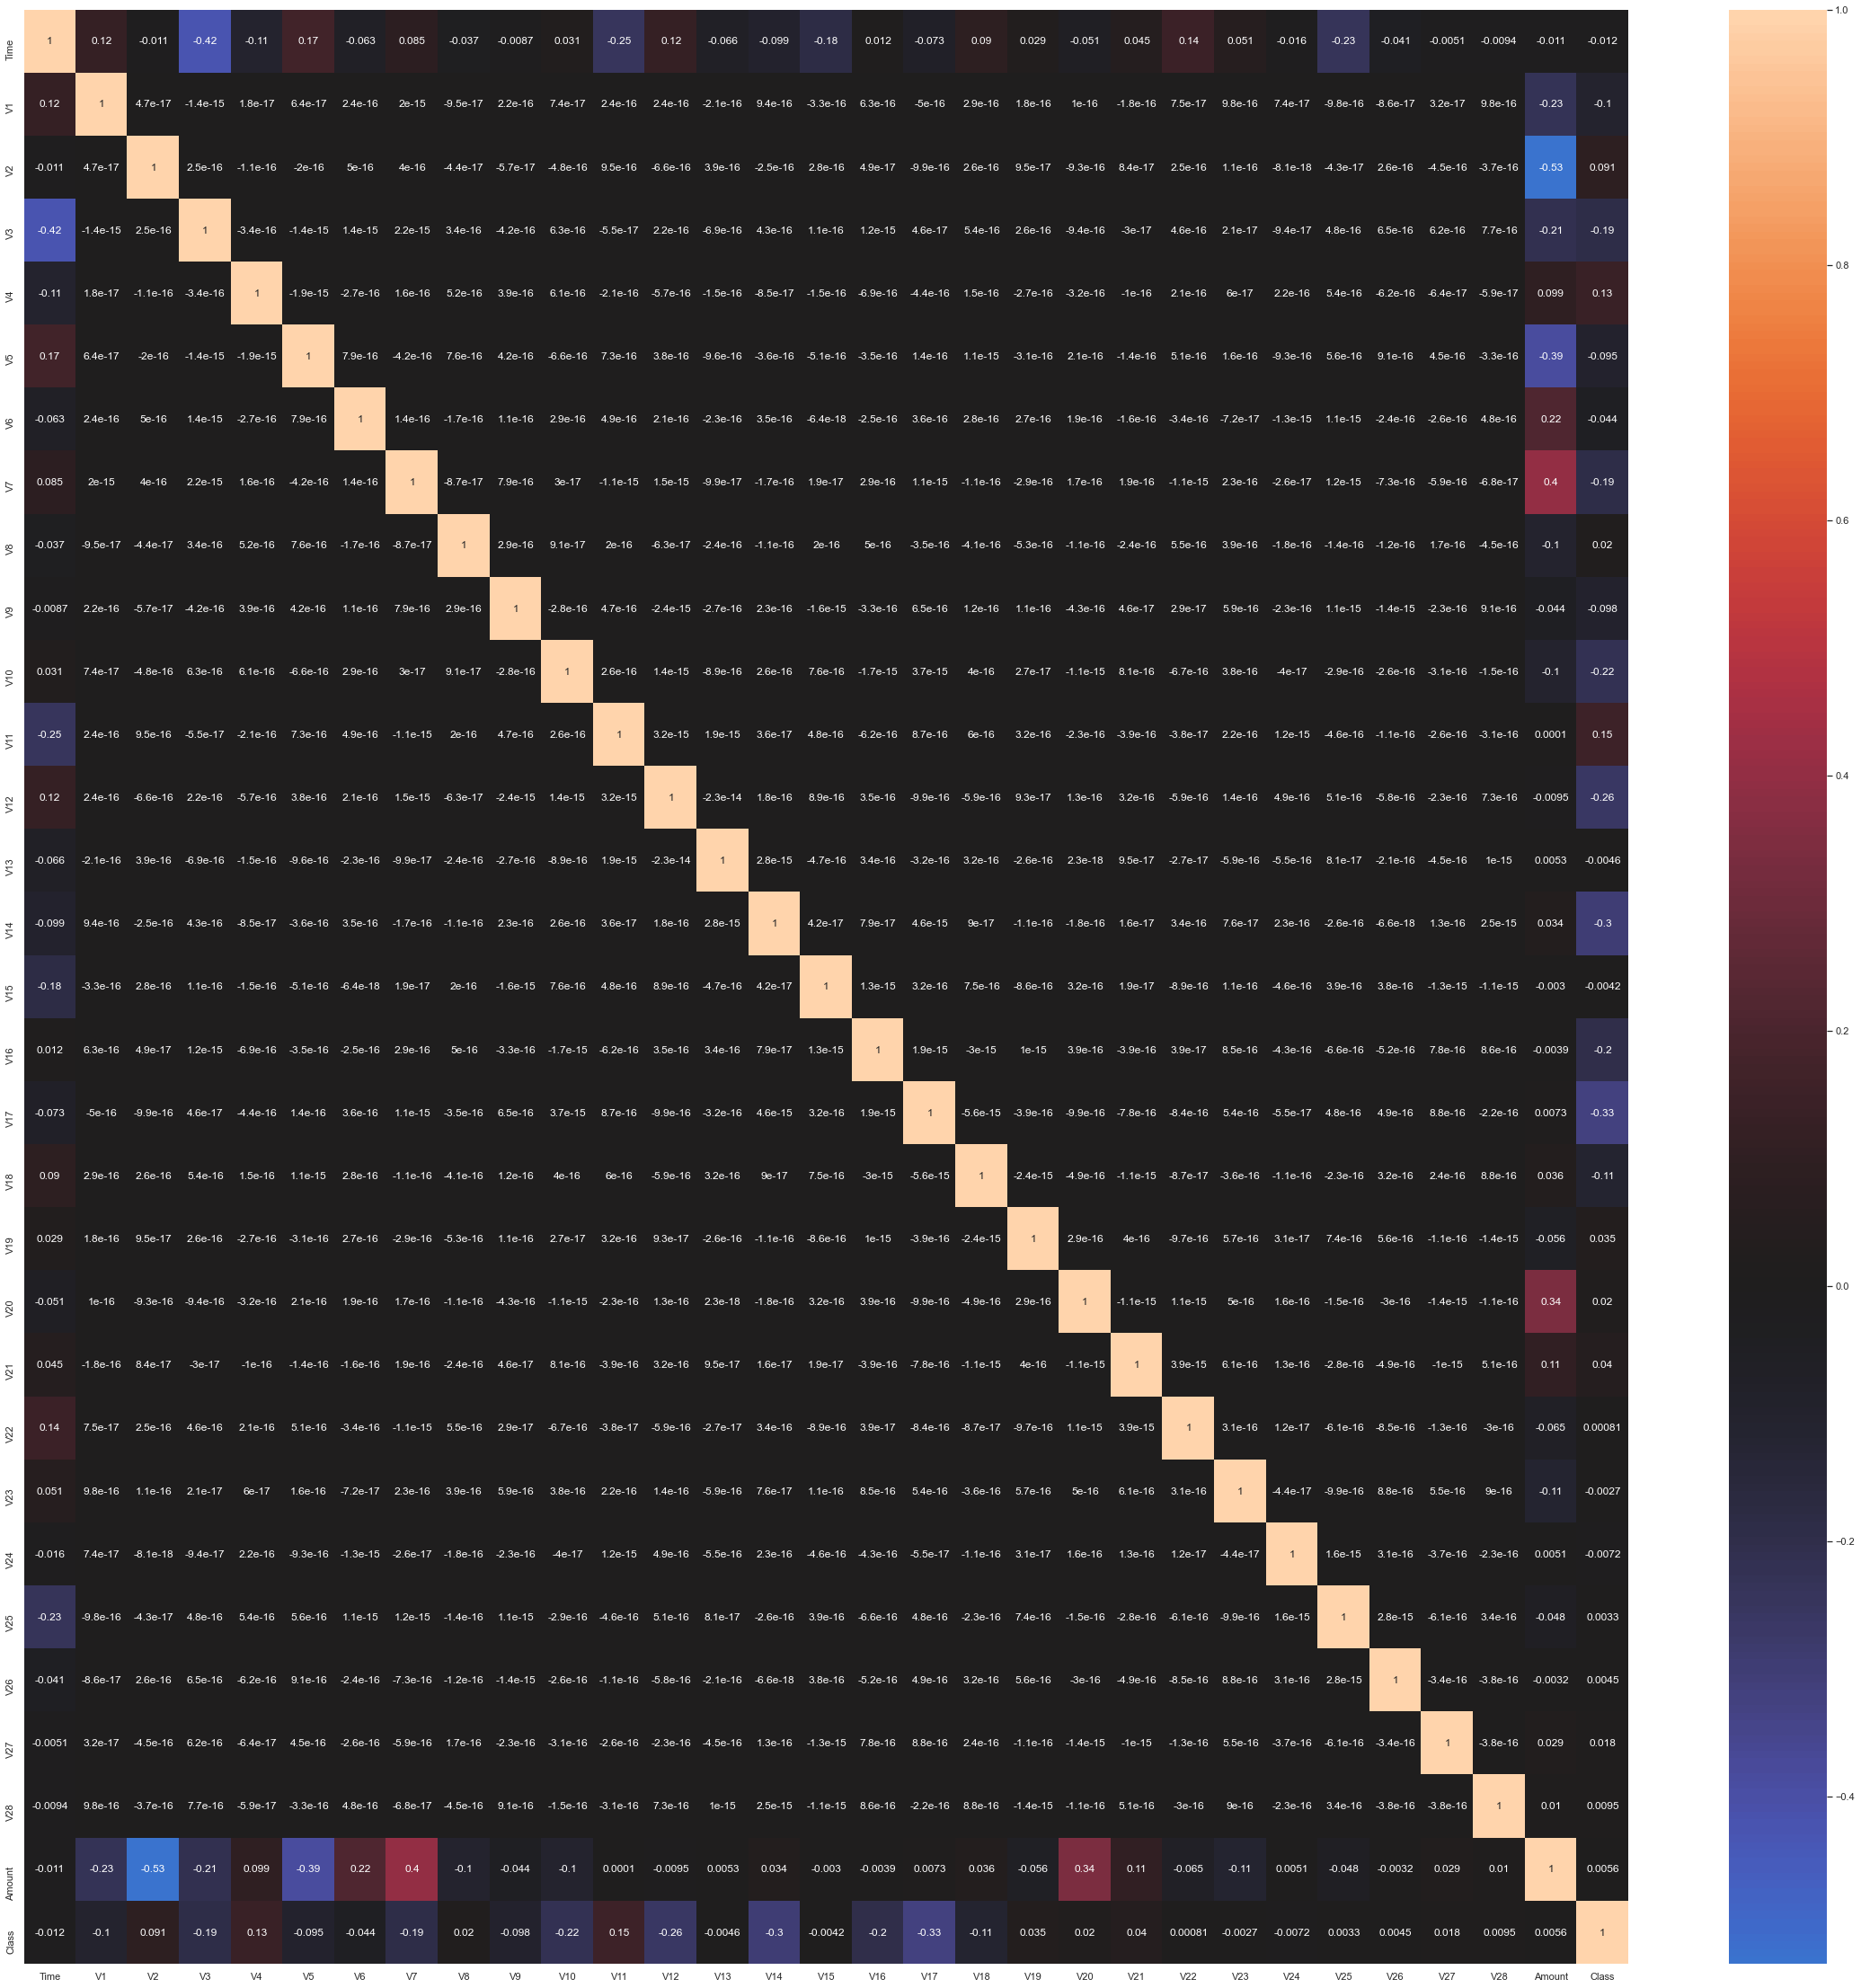

In [6]:
# correlation between features
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(), annot=True, center=0)
plt.show()

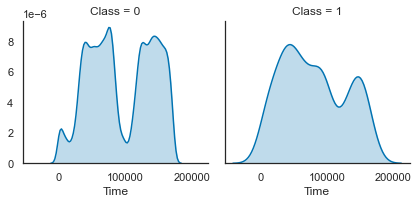

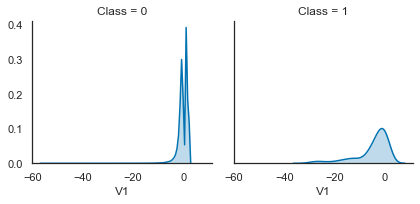

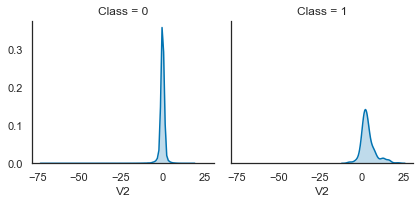

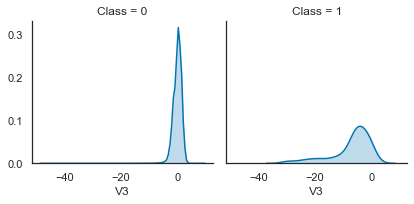

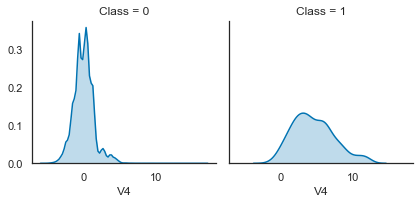

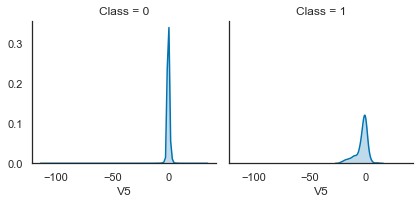

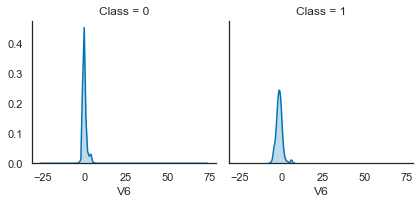

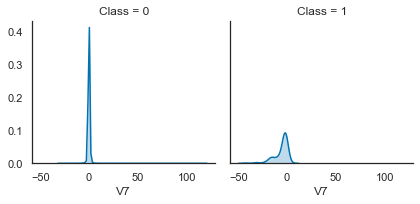

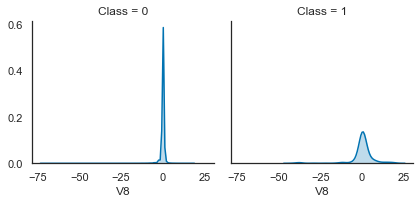

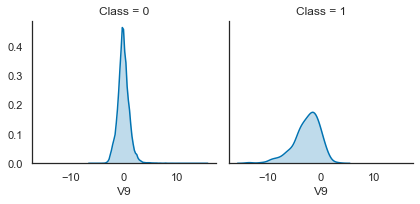

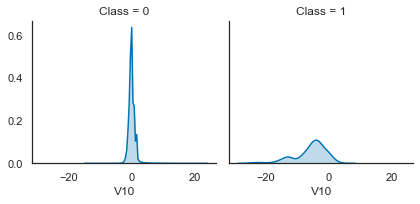

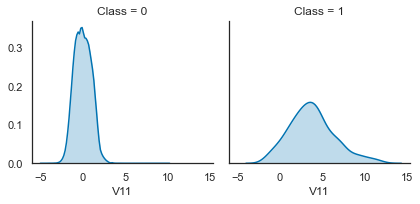

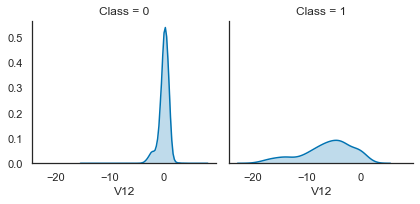

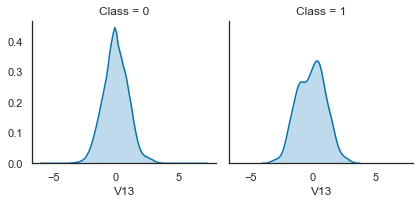

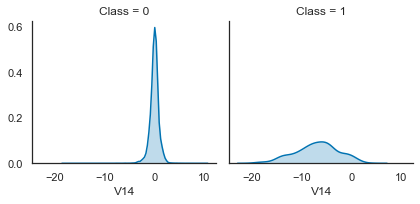

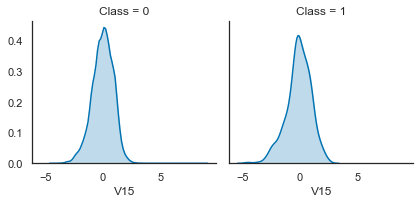

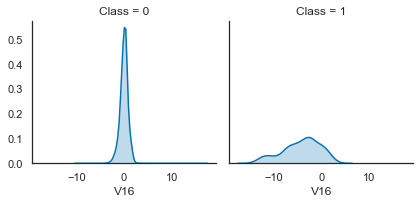

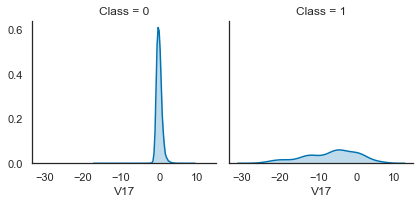

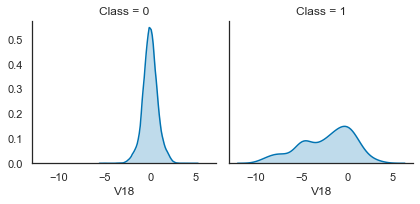

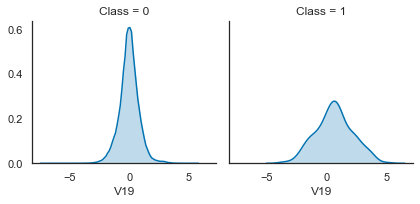

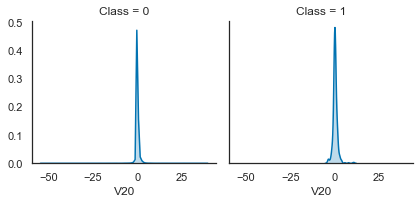

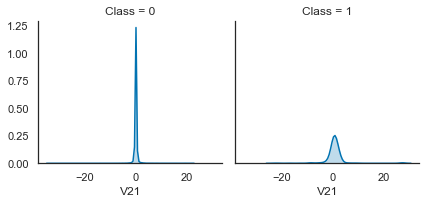

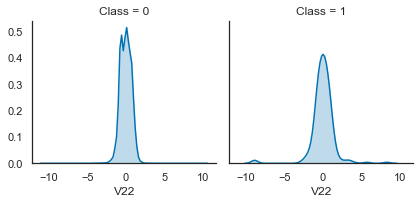

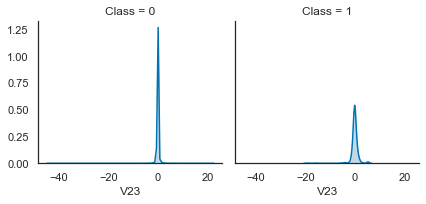

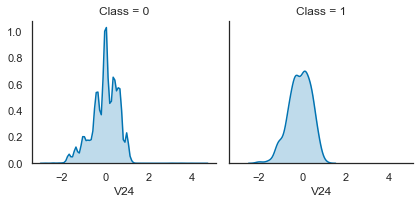

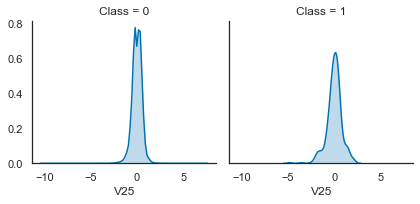

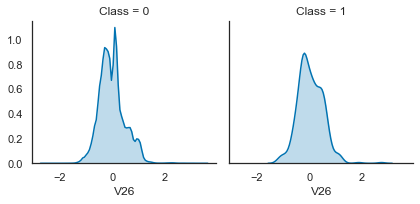

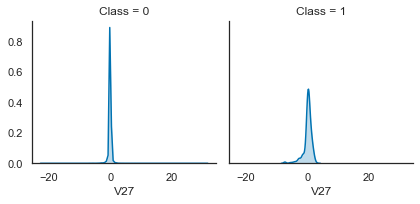

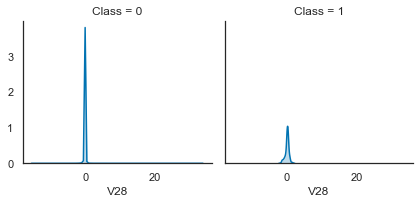

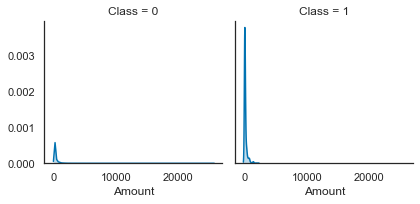

In [20]:
for cl in df.drop(['Class'],axis=1).columns:
    sns.FacetGrid(df, col='Class').map(sns.distplot, cl, hist=False, kde=True, rug=False, kde_kws={'shade':True})
    plt.show()
    

In [6]:
### The features V1, V3, V5, V6, V7, V9, V10, V12, V13, V14, V15, V16, V17, V18, V23, V24 and Time are not correlated to the Class 

#### we will drop these features ####

df.drop(["Time","V1","V3","V5","V6","V7","V9","V10","V12","V13","V14","V15","V16","V17","V18","V23","V24"],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V2      284807 non-null  float64
 1   V4      284807 non-null  float64
 2   V8      284807 non-null  float64
 3   V11     284807 non-null  float64
 4   V19     284807 non-null  float64
 5   V20     284807 non-null  float64
 6   V21     284807 non-null  float64
 7   V22     284807 non-null  float64
 8   V25     284807 non-null  float64
 9   V26     284807 non-null  float64
 10  V27     284807 non-null  float64
 11  V28     284807 non-null  float64
 12  Amount  284807 non-null  float64
 13  Class   284807 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 30.4 MB


In [8]:
df.sample(3)

,V2,V4,V8,V11,V19,V20,V21,V22,V25,V26,V27,V28,Amount,Class
246487,1.294034,-0.558269,0.911291,-2.096546,0.824722,-0.191153,-0.137331,-0.668957,0.477702,-0.364431,-0.308055,-0.076252,5.00,0
192029,-0.246309,1.229594,0.140683,0.450146,-0.279563,-0.195466,0.248419,0.946232,-0.027999,-0.526935,0.066716,-0.042103,12.00,0
152734,-0.436844,0.581318,-0.053411,0.057376,-0.519625,-0.216070,-0.113545,0.057953,-0.629771,0.439976,-0.040919,-0.043152,15.95,0


# Splitting data set into Train and Test Sets

In [9]:
X = df.drop("Class",axis = 1)
y = df['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(256326, 13) (28481, 13) (256326,) (28481,)


In [10]:
#### Scaling all the features ####

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training

* XGBoost
* SVM
* RandomForest
* k nearest neighbour 
* Logistic regression

### XGBoost

In [16]:
XGB = xgboost.XGBClassifier()

## Hyper Parameter Optimization

param_xgb={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]   
}

## This are the best Hyper Parameter for this model
best_param_xgb={
 'min_child_weight': [1],
 'max_depth': [8],
 'learning_rate': [0.15],
 'gamma': [0.1],
 'colsample_bytree': [0.4]
}

######### As I have have already trained this model i will set best_param_xgb as param_distributions ########
rs_xgb = GridSearchCV(XGB,param_grid=best_param_xgb,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

rs_xgb.fit(X_train, y_train)

xgb_best_estimator = rs_xgb.best_estimator_
XGB = rs_xgb.best_estimator_
XGB.fit(X_train, y_train)

c:\users\bvraju\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   32.9s remaining:   49.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   34.0s finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [19]:
print(f'XGB GridSearch best params: {rs_xgb.best_params_}')
print()
print(f'XGB GridSearch best score: {rs_xgb.best_score_}')

XGB GridSearch best params: {'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.4}

XGB GridSearch best score: 0.9686736690182766


### SVM

In [36]:
SVM = SVC()

## Hyper Parameter Optimization

param_svm={
 "C"    : [1.0, 10.0, 100.0, 1000.0 ] ,
 "degree"        : [ 3, 4, 5 ],
 "decision_function_shape" : [ 'ovr','linear' ],
 "gamma"            : [  0.1, 0.2 , 0.3, 0.4 , 'scale' ],  
}

## This are the best Hyper Parameter for this model
best_param_svm={
 "C"    : [1] ,
 "degree"        : [ 3 ],
 "decision_function_shape" : [ 'ovr' ],
 "gamma"            : ['scale' ],  
}

######### As I have have already trained this model i will set best_param_xgb as param_distributions ########
rs_svm = RandomizedSearchCV(SVM,param_distributions=best_param_svm,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

rs_svm.fit(X_train, y_train)

svm_best_estimator = rs_svm.best_estimator_

SVM = rs_svm.best_estimator_
SVM.fit(X_train, y_train)

c:\users\bvraju\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.5min remaining:  3.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.4min finished


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
print(f'SVM RandomizedSearchCV best params: {rs_svm.best_params_}')
print()
print(f'SVM RandomizedSearchCV best score: {rs_svm.best_score_}')

SVM RandomizedSearchCV best params: {'gamma': 'scale', 'degree': 3, 'decision_function_shape': 'ovr', 'C': 1}

SVM RandomizedSearchCV best score: 0.9151175040731893


### RandomForest

In [26]:
RFC = RandomForestClassifier()

param_rfc = {"max_depth": [None],
              "max_features": [3,"sqrt", "log2"],
              "min_samples_split": [n for n in range(1, 9)],
              "min_samples_leaf": [5, 7],
              "n_estimators" :[10,100,200, 500],
              "criterion": ["gini", "entropy"],
            "class_weight":[{0: 1, 1: 107160},{0: 1, 1: 1071600},
              {0: 1, 1: 107160000},{0: 1, 1: 1071600000}]}

best_param_rfc = {"max_depth": [None],
              "max_features": ['auto'],
              "min_samples_split": [2],
              "min_samples_leaf": [1],
              "n_estimators" :[10],
              "criterion": ["gini"],
              "class_weight":[{0: 1, 1: 1071600000}]}

######### As I have have already trained this model i will set best_param_xgb as param_distributions ########
rf_rfc = RandomizedSearchCV(RFC,param_distributions=best_param_rfc,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

rf_rfc.fit(X_train, y_train)

rfc_best_estimator = rf_rfc.best_estimator_

RFC = rf_rfc.best_estimator_
RFC.fit(X_train, y_train)

c:\users\bvraju\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   35.4s remaining:   53.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.5s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 1, 1: 1071600000}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [27]:
print(f'RFC RandomizedSearchCV best params: {rf_rfc.best_params_}')
print()
print(f'RFC RandomizedSearchCV best score: {rf_rfc.best_score_}')

RFC RandomizedSearchCV best params: {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'criterion': 'gini', 'class_weight': {0: 1, 1: 1071600000}}

RFC RandomizedSearchCV best score: 0.9478681012568547


### k nearest neighbour

In [28]:
KNN = KNeighborsClassifier()

param_knn = {'algorithm': ['auto'],
                 'weights': ['uniform', 'distance'], 
                 'leaf_size': [20, 25, 30], 
                 'n_neighbors': [5, 10, 15, 20]}

best_param_knn = {'algorithm': ['auto'],
                 'weights': ['uniform'], 
                 'leaf_size': [30], 
                 'n_neighbors': [5]}

######### As I have have already trained this model i will set best_param_xgb as param_distributions ########
rf_knn = RandomizedSearchCV(KNN,param_distributions=best_param_knn,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

rf_knn.fit(X_train, y_train)

knn_best_estimator = rf_knn.best_estimator_

KNN = rf_knn.best_estimator_
KNN.fit(X_train, y_train)

c:\users\bvraju\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.5min remaining:  3.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.6min finished


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [30]:
print(f'KNN RandomizedSearchCV best params: {rf_knn.best_params_}')
print()
print(f'KNN RandomizedSearchCV best score: {rf_knn.best_score_}')

KNN RandomizedSearchCV best params: {'weights': 'uniform', 'n_neighbors': 5, 'leaf_size': 30, 'algorithm': 'auto'}

KNN RandomizedSearchCV best score: 0.8783052040911628


### Logistic regression

In [34]:
LR = LogisticRegression()

param_lr = {'C': [1, 10, 100, 200],
                 'class_weight': [{0: 1, 1: 282.0},{0: 1, 1: 577.0},{0: 1, 1: 141.0}], 
                 'penalty': ['l1','l2'], 
                    }

best_param_lr = {'C': [1.0],
                 'class_weight': [{0: 1, 1: 282.0}], 
                 'penalty': ['l2'], 
                 }

######### As I have have already trained this model i will set best_param_xgb as param_distributions ########
rf_lr = RandomizedSearchCV(LR,param_distributions=best_param_lr,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

rf_lr.fit(X_train, y_train)

lr_best_estimator = rf_lr.best_estimator_

LR = rf_lr.best_estimator_
LR.fit(X_train, y_train)

c:\users\bvraju\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.7s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.8s finished


LogisticRegression(C=1.0, class_weight={0: 1, 1: 282.0}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
print(f'LR RandomizedSearchCV best params: {rf_lr.best_params_}')
print()
print(f'LR RandomizedSearchCV best score: {rf_lr.best_score_}')

LR RandomizedSearchCV best params: {'penalty': 'l2', 'class_weight': {0: 1, 1: 282.0}, 'C': 1.0}

LR RandomizedSearchCV best score: 0.9628217243980537


### Model Comparison

In [48]:
def CVScore(classifiers):
    
    cv_score = []
    names = []
    
    for n_classifier in range(len(classifiers)):
        name = classifiers[n_classifier][0]
        model = classifiers[n_classifier][1]
        cv_score.append(cross_val_score(model, X_train, y_train, scoring = "roc_auc", cv = 3, n_jobs=4))
        names.append(name)
        
    cv_means = []
    
    for cv_result in cv_score:
        cv_means.append(cv_result.mean())
        
    cv_res = pd.DataFrame({"Model":names,"CVMeans":cv_means})
    cv_res=cv_res.sort_values("CVMeans", axis = 0, ascending = False, inplace = False).reset_index(drop=True)
    print('\n-------------------------CrossVal Training scores-------------------------\n\n', cv_res)

clf_list = [ ("XGB", XGB), ("SVC",SVM) ,("RandomForest", RFC) , ("KNN", KNN),("LogisticRegression",LR)]

CVScore(clf_list)


-------------------------CrossVal Training scores-------------------------

                 Model   CVMeans
0                 XGB  0.962932
1  LogisticRegression  0.962008
2        RandomForest  0.949550
3                 SVC  0.920745
4                 KNN  0.872793


## WE NEED TO CONSIDER RECALL AS BASIC REQUIRMENT METRIC AND THEN ACCURACY  

# WE SET THE BASIC RECALL AS 80%

In [44]:
classifiers = [XGB,SVM,RFC,KNN,LR]

for classifier in classifiers:   
    y_pred= classifier.predict(X_test)
    print("classifier =>",classifier)
    print()
    print("Accuracy score :",accuracy_score(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print('========================================================')

classifier => XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Accuracy score : 0.9995435553526912
[[28441     1]
 [   12    27]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28442
           1       0.96      0.69      0.81        39

    accuracy                           1.00     28481
   macro avg       0.98      0.85      0.90     28481
weighted avg       1.00  

# =============================================================
# BEST MODEL IS RandomForestClassifier WITH 82% RECALL 98.45% ACC
# =============================================================

### Plotting learning curves

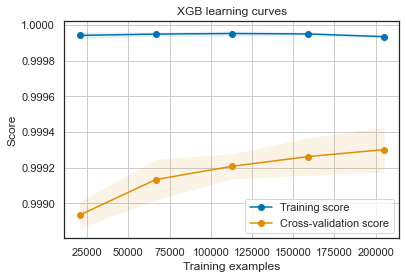

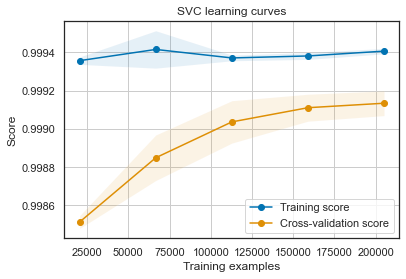

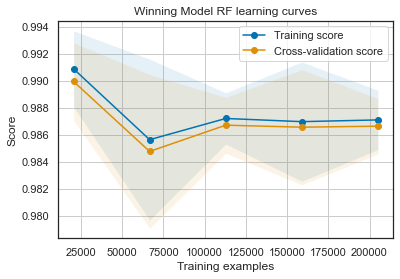

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1)

    plt.plot(train_sizes, train_scores_mean, 'o-',
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-',
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
plot_learning_curve(XGB,"XGB learning curves", X_train, y_train, cv=5)
plot_learning_curve(SVM,"SVC learning curves", X_train, y_train, cv=5)
plot_learning_curve(RFC,"Winning Model RF learning curves", X_train, y_train, cv=5)
plot_learning_curve(KNN,"KNN:learning curves", X_train, y_train, cv=5)
plot_learning_curve(LR,"LR:learning curves", X_train, y_train, cv=5)